In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [3]:
# Head of data frame
data = pd.read_csv('Customer Churn Data.csv')
data.head()

Account length  International plan  Voice mail plan  \
0             128                   0                1   
1             107                   0                1   
2             137                   0                0   
3              84                   1                0   
4              75                   1                0   

   Number voice mail messages  Total day minutes  Total day calls  \
0                          25              265.1              110   
1                          26              161.6              123   
2                           0              243.4              114   
3                           0              299.4               71   
4                           0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

## Pre-processing

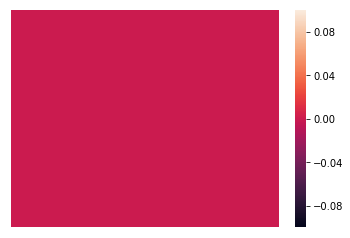

In [11]:
sns.heatmap(data.isnull(),xticklabels=False,yticklabels=False)
# No Null Values

In [13]:
data.shape

(3333, 20)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                         3333 non-null object
Account length                3333 non-null int64
Area code                     3333 non-null int64
International plan            3333 non-null object
Voice mail plan               3333 non-null object
Number voice mail messages    3333 non-null int64
Total day minutes             3333 non-null float64
Total day calls               3333 non-null int64
Total day charge              3333 non-null float64
Total eve minutes             3333 non-null float64
Total eve calls               3333 non-null int64
Total eve charge              3333 non-null float64
Total night minutes           3333 non-null float64
Total night calls             3333 non-null int64
Total night charge            3333 non-null float64
Total intl minutes            3333 non-null float64
Total intl calls              3333 non-null int64
Total intl charge         

In [15]:
data.describe()

Account length    Area code  Number voice mail messages  \
count     3333.000000  3333.000000                 3333.000000   
mean       101.064806   437.182418                    8.099010   
std         39.822106    42.371290                   13.688365   
min          1.000000   408.000000                    0.000000   
25%         74.000000   408.000000                    0.000000   
50%        101.000000   415.000000                    0.000000   
75%        127.000000   510.000000                   20.000000   
max        243.000000   510.000000                   51.000000   

       Total day minutes  Total day calls  Total day charge  \
count        3333.000000      3333.000000       3333.000000   
mean          179.775098       100.435644         30.562307   
std            54.467389        20.069084          9.259435   
min             0.000000         0.000000          0.000000   
25%           143.700000        87.000000         24.430000   
50%           179.400000       101.000000         30.500000   
75%           216.400000       114.000000         36.790000   
max           350.800000       165.000000         59.640000   

       Total eve minutes  Total eve calls  Total eve charge  \
count        3333.000000      3333.000000       3333.000000   
mean          200.980348       100.114311         17.083540   
std            50.713844        19.922625          4.310668   
min             0.000000         0.000000          0.000000   
25%           166.600000        87.000000         14.160000   
50%           201.400000       100.000000         17.120000   
75%           235.300000       114.000000         20.000000   
max           363.700000       170.000000         30.910000   

       Total night minutes  Total night calls  Total night charge  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711            9.039325   
std              50.573847          19.568609            2.275873   
min              23.200000          33.000000            1.040000   
25%             167.000000          87.000000            7.520000   
50%             201.200000         100.000000            9.050000   
75%             235.300000         113.000000           10.590000   
max             395.000000         175.000000           17.770000   

       Total intl minutes  Total intl calls  Total intl charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       Customer service calls  
count             3333.000000  
mean                 1.562856  
std                  1.315491  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  2.000000  
max                  9.000000

In [16]:
# Converting Churn from true/false to 1/0
data['Churn'] = data['Churn'].astype('int32')

In [23]:
# Dropping state,account length and area code
data.drop(['Account length','Area code','State'],axis=1,inplace=True)

In [24]:
data.head()

International plan Voice mail plan  Number voice mail messages  \
0                 No             Yes                          25   
1                 No             Yes                          26   
2                 No              No                           0   
3                Yes              No                           0   
4                Yes              No                           0   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   Total night charge  Total intl minutes  Total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   Total intl charge  Customer service calls  Churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

In [27]:
# Converting Categorical features to numeric features
data = pd.get_dummies(data,drop_first=True)

## Visualization

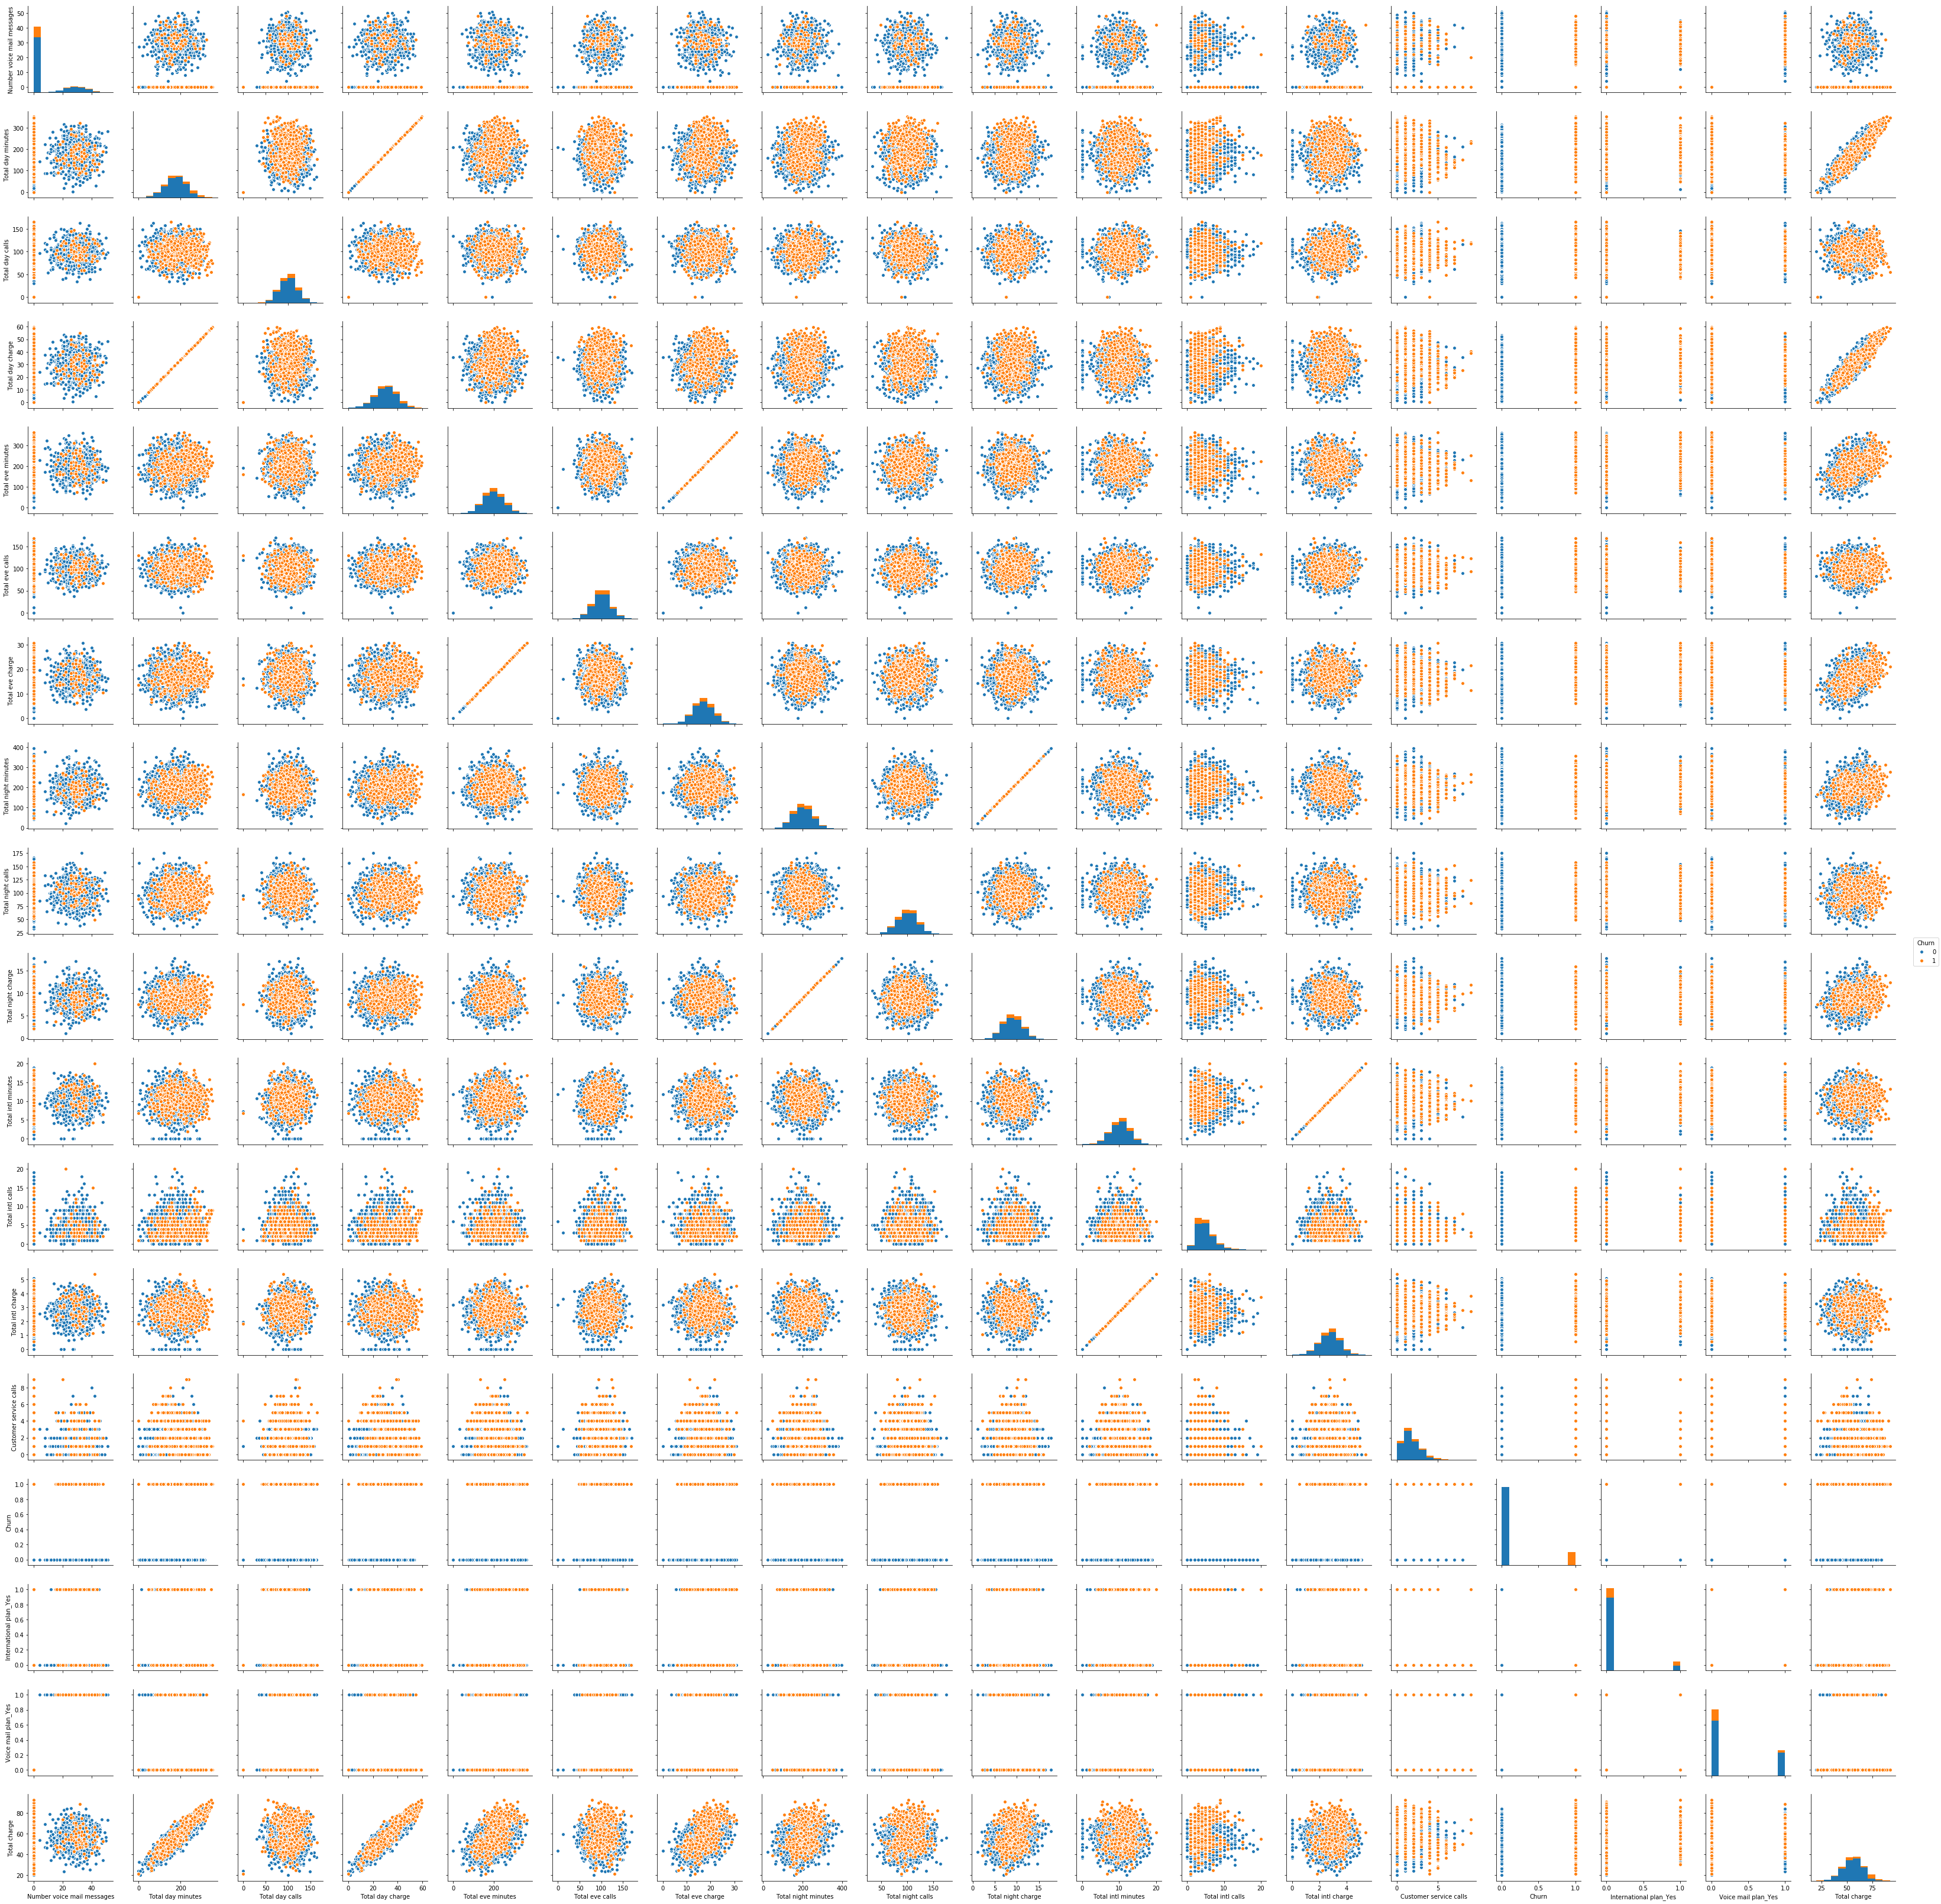

In [96]:
# Pairplot to find correlated features
sns.pairplot(data,hue='Churn')

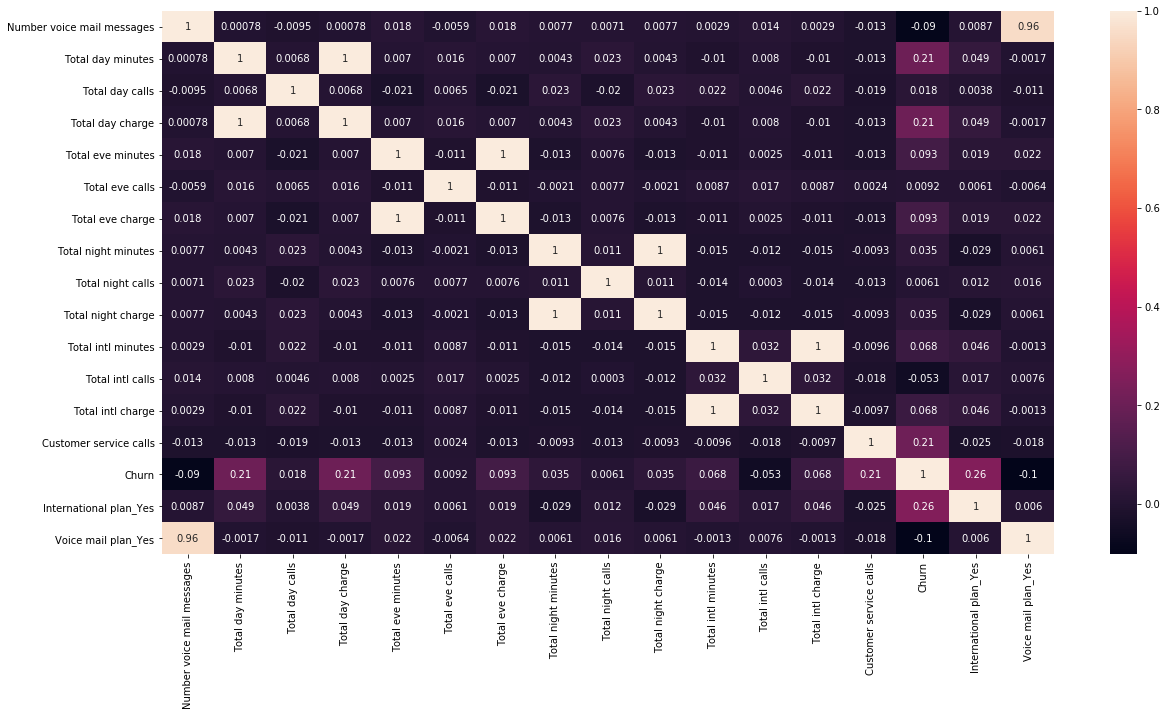

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
# No Clear correlation of customer churn with the given features. Number of customer calls and total day charge seem to contribute to customer churn.
# Rest of the correlations are obvious like charge increasing with number of mins talked and People with voice mail plan use a lot of voicemails.

In [35]:
# getting total charge
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']

In [39]:
# Correlation between Total charge and Churn
data['Total charge'].corr(data['Churn'])

0.22696174541537484

In [40]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

## Model Building

In [64]:
data.head()

Number voice mail messages  Total day minutes  Total day calls  \
0                          25              265.1              110   
1                          26              161.6              123   
2                           0              243.4              114   
3                           0              299.4               71   
4                           0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  International plan_Yes  Voice mail plan_Yes  \
0                       1      0                       0                    1   
1                       1      0                       0                    1   
2                       0      0                       0                    0   
3                       2      0                       1                    0   
4                       3      0                       1                    0   

   Total charge  
0         72.86  
1         55.54  
2         59.00  
3         65.02  
4         49.36

In [66]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Churn'],axis=1),data['Churn'],test_size = 0.25,random_state = 0)

In [67]:
print([x_train.shape, x_test.shape])

[(2499, 17), (834, 17)]


In [68]:
# standardizing the training set and test set using StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [69]:
# Decision tree classifier to classify customers as churned/non-churned
classifier = DecisionTreeClassifier(criterion='gini',random_state=0)
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [70]:
# structure of decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 224, 16,  1.40387416e+00, 0.25114744, 2499, 2.499e+03)
 (  2, 205, 13,  1.47932553e+00, 0.1672344 , 2291, 2.291e+03)
 (  3, 196, 14,  1.39084876e+00, 0.10698933, 2116, 2.116e+03)
 (  4, 191, 16,  1.33582926e+00, 0.05548223, 1926, 1.926e+03)
 (  5, 188, 12,  2.84715700e+00, 0.05103745, 1908, 1.908e+03)
 (  6, 185,  0,  2.89226770e+00, 0.05012035, 1905, 1.905e+03)
 (  7,  30,  4, -6.78398490e-01, 0.04922463, 1901, 1.901e+03)
 (  8,  27, 11,  4.10352135e+00, 0.0234342 ,  506, 5.060e+02)
 (  9,  14,  2, -1.34136140e+00, 0.01964443,  504, 5.040e+02)
 ( 10,  13,  5, -9.35694337e-01, 0.15673469,   35, 3.500e+01)
 ( 11,  12,  4, -1.42492032e+00, 0.5       ,    6, 6.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    3, 3.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    3, 3.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   29, 2.900e+01)
 ( 15,  22,  2,  1.64526248e+00, 0.00849241,  469, 4.690e+02)
 ( 16,  17,  3,  1.10061932e+00, 0.00456619,  437, 4.370e+02)
 ( -1,  

247

In [86]:
x_test.head()

Number voice mail messages  Total day minutes  Total day calls  \
405                            0              264.3               91   
118                           36              113.7              117   
710                            0              195.3               70   
499                            0              175.2               91   
2594                           0              345.3               81   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
405              44.93              160.9              115             13.68   
118              19.33              157.5               82             13.39   
710              33.20              216.7              108             18.42   
499              29.78              244.4              109             20.77   
2594             58.70              203.4              106             17.29   

      Total night minutes  Total night calls  Total night charge  \
405                 198.6                 73                8.94   
118                 177.6                118                7.99   
710                 259.9                119               11.70   
499                  75.8                 95                3.41   
2594                217.5                107                9.79   

      Total intl minutes  Total intl calls  Total intl charge  \
405                  9.3                 5               2.51   
118                 10.0                 3               2.70   
710                 12.5                 4               3.38   
499                  7.5                 2               2.03   
2594                11.8                 8               3.19   

      Customer service calls  International plan_Yes  Voice mail plan_Yes  \
405                        0                       1                    0   
118                        2                       0                    1   
710                        3                       0                    0   
499                        1                       0                    0   
2594                       1                       1                    0   

      Total charge  
405          67.55  
118          40.71  
710          63.32  
499          53.96  
2594         85.78

In [75]:
# predict class labels using decision tree classifier
y_pred = classifier.predict(x_test_scaled)

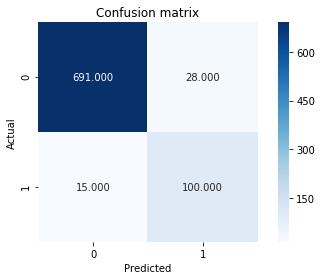

In [77]:
# confusion matrix for decision tree classifier
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [78]:
### Evaluation metrics for decision tree classifier
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-accuracy
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
F1_score = metrics.f1_score(y_test,y_pred)
print([accuracy, error, precision, recall, F1_score])

[0.9484412470023981, 0.05155875299760193, 0.78125, 0.8695652173913043, 0.8230452674897121]


In [130]:
# SVM classifier to classify customers as churned/non-churned
classifier = SVC(C=5,kernel='rbf')
classifier.fit(x_train_scaled,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [131]:
# complexity of kernel SVM classifier by computing the percentage of support vectors
len(classifier.support_vectors_)/len(x_train_scaled)

0.2733093237294918

In [133]:
# class labels using kernel SVM classifier
y_pred = classifier.predict(x_test_scaled)

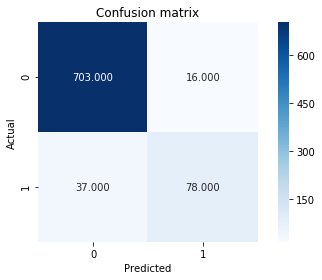

In [134]:
# confusion matrix for kernel SVM classifier
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [135]:
# evaluation metrics for kernel SVM classifier
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-accuracy
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
F1_score = metrics.f1_score(y_test,y_pred)
print([accuracy, error, precision, recall, F1_score])

[0.9364508393285371, 0.06354916067146288, 0.8297872340425532, 0.6782608695652174, 0.7464114832535886]


In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
# Random Forest Classifier Model
rfc = RandomForestClassifier()
rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [154]:
y_pred  = rfc.predict(x_test_scaled)

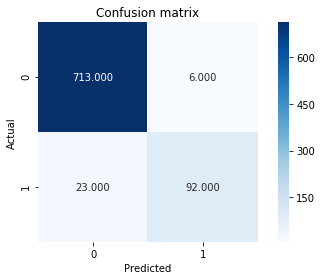

In [155]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [156]:
# evaluation metrics for Random Forest Classifier
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-accuracy
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
F1_score = metrics.f1_score(y_test,y_pred)
print([accuracy, error, precision, recall, F1_score])

[0.9652278177458034, 0.03477218225419665, 0.9387755102040817, 0.8, 0.8638497652582161]
